In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
X = boston['data'];
y = boston['target']

In [8]:
X.shape, y.shape

((506, 13), (506,))

In [12]:
z = np.random.normal(loc = 8, scale = 5, size = 100);
(z**2).mean()

97.70648633056337

In [13]:
np.random.uniform(size = 10)

array([0.47039386, 0.18579486, 0.29915805, 0.0941651 , 0.80963857,
       0.78593144, 0.8203023 , 0.85695365, 0.49922511, 0.34200388])

In [14]:
np.random.normal(size = 10)

array([ 0.80854212, -0.57340571, -0.15236381, -2.63845279,  1.81581523,
        1.56663698, -0.68377056, -1.3355463 , -0.48174316,  1.41695225])

In [11]:
#бэггинг над моделями
def compute_biase_variance(regressor, X, y, num_runs):
    zero_array = np.zeros(shape = (X.shape[0], num_runs));
    tree = regressor;
    
    for i in range(num_runs):
        sample = np.random.randint(X.shape[0], size = X.shape[0]);
        X_train, y_train = X[sample], y[sample];
        tree.fit(X_train, y_train);
        out_frag = np.setxor1d(sample, range(X.shape[0]));
        zero_array[out_frag , i] = tree.predict(X[out_frag]);
    
    bias_zero = np.asarray(list(map(lambda n: zero_array[n, :][np.nonzero(zero_array[n, :])].mean(), range(zero_array.shape[0]))));
    arg = np.where(np.isnan(bias_zero) == False)[0];
    bias = np.power(np.array(bias_zero)[arg] - y[arg], 2).mean();
    
    #var_zero = list(map(lambda n: zero_array[n, :][np.nonzero(zero_array[n, :])], range(zero_array.shape[0])));
    #print(np.asarray(var_zero), np.asarray(bias_zero), np.asarray(var_zero) - np.asarray(bias_zero));
    #print(np.asarray(bias_zero)[arg] - np.asarray(var_zero)[arg])
    #variance = np.power(np.asarray(bias_zero)[arg] - np.asarray(var_zero)[arg], 2).mean(axis = 0);
    #print(variance)
    var_zero = list(map(lambda n: zero_array[n, :][np.nonzero(zero_array[n, :])].var(), range(zero_array.shape[0])));
    #print(np.array(var_zero)[arg].mean())
    variance = np.array(var_zero)[arg].mean()
    
    error_zero = np.asarray(list(map(lambda n: zero_array[n, :][np.nonzero(zero_array[n, :])], range(zero_array.shape[0]))))
    error = np.power(np.asarray(error_zero)[arg] - y[arg], 2);
    error = list(map(lambda x: np.array(error[x]).mean(), range(error.shape[0])))
    error = np.asarray(error).mean()
    return bias, variance, error
    #print(np.power(np.asarray(error_zero)[arg] - y[arg], 2))
    """
    :param regressor: sklearn estimator with fit(...) and predict(...) method
    :param X: numpy-array representing training set ob objects, shape [n_obj, n_feat]
    :param y: numpy-array representing target for training objects, shape [n_obj]
    :param num_runs: int, number of samples (s in the description of the algorithm)
    
    :returns: bias (float), variance (float), error (float) 
    each value is computed using bootstrap
    """
    ### your code here

In [489]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42);
tree = LinearRegression();
tree.fit(X_train, y_train);
print(f'Bias - {np.power(y_test - tree.predict(X_test), 2).mean()}')

Bias - 21.51744423117731


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42);
tree = DecisionTreeRegressor();
tree.fit(X_train, y_train);
print(f'Bias - {np.power(y_test - tree.predict(X_test), 2).mean()}')

Bias - 10.839013157894737


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42);
tree = RandomForestRegressor();
tree.fit(X_train, y_train);
print(f'Bias - {np.power(y_test - tree.predict(X_test), 2).mean()}')

Bias - 9.369632342105266


In [485]:
for i in [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]:
    print(compute_biase_variance(i, X, y, 1000))

(23.742825425732157, 0.9323604517872887, 24.67518587751945)
(10.322607798093497, 13.041535723277923, 23.364143521371417)
(10.707469889783301, 2.301942625868112, 13.009412515651412)


# Линейная регрессия, Решающее дерево + Случайный лес.

Для линейной регрессии: Bias - большой, поскольку семейство построенных моделей сильно отличается от идеальной, Variance - маленький, так как сами модели друг от друга отличаются сильно(корреляция мала).

Для решающего дерева: Bias - меньше, чем для линейной регрессии, поскольку само решающее дерево лучше подстраивается под обучающую выборку => Bias уменьшается, но Variance - большой, так как сами модели друг от друга отличаются слабо(корреляция между двумя моделями сильнее, чем для линейной регрессии).

Для случайного леса: Bias точно такой же, как и для решающего дерева, поскольку просто идет усреднение всего семейства моделей для одного СЛ, а Variance гораздо меньше, так как корреляция меньше, чем для решающего дерева.

В теории - уменьшает в N раз, где N - количество моделей, полученных в результате бутстрапа. 


В данном случае нет, поскольку мы предпологаем, что ковариация двух моделей равна нулю, то есть ошибки не связаны, в данном случае ситуация обратная.

# Визуализация базовых алгоритмов бэггинга.

Реализация plot_predictions.

In [85]:
def plot_predictions(regressor, X, y, num_runs = 100, num_tests = 10, title = ""):
    test_sample = np.random.randint(X.shape[0], size = num_tests);
    X_test, y_test = X[test_sample], y[test_sample];
    train_sample = np.setxor1d(test_sample, range(X.shape[0]));
    X_train, y_train = X[train_sample], y[train_sample];
    arr_pred = np.zeros(shape = (num_tests, num_runs+1));
    arr_pred[:, 0] = y_test;
    for i in range(num_runs):
        boots = np.random.randint(X_train.shape[0], size = X_train.shape[0]);
        tree = regressor;
        tree.fit(X_train[boots], y_train[boots]);
        arr_pred[:, i+1] = tree.predict(X_test);
    plt.scatter(range(num_tests), arr_pred[:, 0], c = 'black', cmap= 'spring',  linewidths = 4);
    for i in range(arr_pred.shape[1]-1):
        plt.scatter(range(10), arr_pred[:, i+1], c = 'red', cmap = 'spring', edgecolor = 'green');
    plt.title(title);
    plt.xlabel(f'Test object')
    plt.ylabel(f'Prediction')
    plt.xticks(np.arange(10))

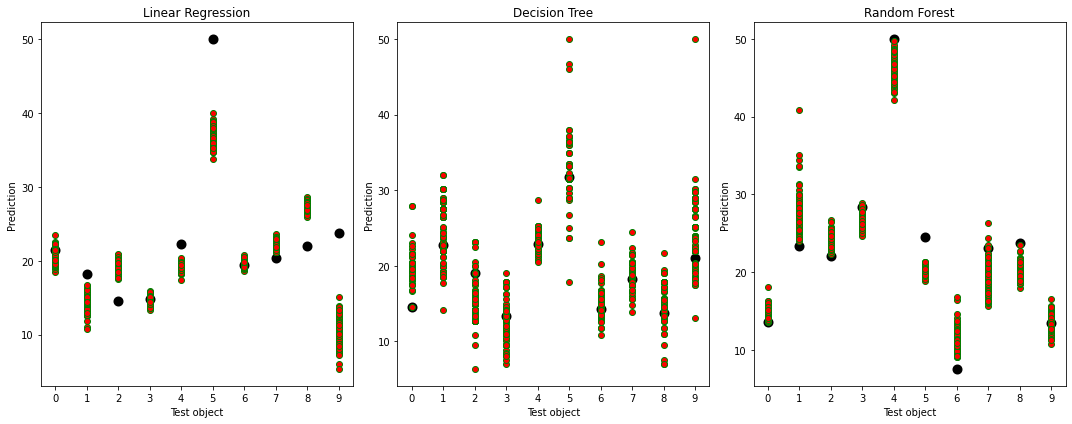

In [86]:
plt.figure(figsize = (15, 6));
labels = ['Linear Regression', 'Decision Tree', 'Random Forest']
for i, tree in enumerate([LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]):
    plt.subplot(1, 3, i + 1);
    plot_predictions(tree, X, y, title = f'{labels[i]}')
    plt.tight_layout();
plt.show()

Bias характеризуется тем, насколько удалена усредненная точка предсказаний алгоритмов от истинного ответа на объекте. Для линеной регресии видно, что в основном bias большой, так как модели имеют большую погрешность с истинным ответом. В то же самое время для дерева и леса усредненный ответ гораздо ближе приближен к истинному. 

Variance характеризуется тем, насколько полученные алогоритмы "раскиданы" относительно усредненного алгоритма. Для линейной регрессии это параметр гораздо меньше, чем для дерева и леса, поскольку в основной массе алгоритмы "кучкуются" рядом друг с другом, для леса и дерева же разброс двух крайний алгоритмов имеет гораздо большие значения. 

# График зависимости для решающего дерева.

In [22]:
def compute_biase_variance(regressor, X, y, num_runs, params):
    zero_array = np.zeros(shape = (X.shape[0], num_runs));
    bias_depth, var_depth, bias_feature, var_feature = [], [], [], [];
    for param in params:
        if param == 'max_depth':
            for i in range(1, 11):
                tree = regressor(max_depth = i)
                for i in range(num_runs):
                    sample = np.random.randint(X.shape[0], size = X.shape[0]);
                    X_train, y_train = X[sample], y[sample];
                    tree.fit(X_train, y_train);
                    out_frag = np.setxor1d(sample, range(X.shape[0]));
                    zero_array[out_frag , i] = tree.predict(X[out_frag]);
    
                bias_zero = np.asarray(list(map(lambda n: zero_array[n, :][np.nonzero(zero_array[n, :])].mean(), range(zero_array.shape[0]))));
                arg = np.where(np.isnan(bias_zero) == False)[0];
                bias = np.power(np.array(bias_zero)[arg] - y[arg], 2).mean();
                
                var_zero = list(map(lambda n: zero_array[n, :][np.nonzero(zero_array[n, :])].var(), range(zero_array.shape[0])));
                variance = np.array(var_zero)[arg].mean();
           
                bias_depth.append(bias);
                var_depth.append(variance)
            plt.subplot(1, 2, 1);
            plt.plot(range(1, 11), bias_depth, color = 'black', label = 'bias');
            plt.plot(range(1, 11), var_depth, color = 'red', label = 'variance');
            plt.legend();
            plt.xticks(range(11))
            plt.grid();
            plt.title(f'Range of {param}')
        else:
            for i in range(1, X.shape[1]+1):
                tree = regressor(max_features = i);
                for i in range(num_runs):
                    sample = np.random.randint(X.shape[0], size = X.shape[0]);
                    X_train, y_train = X[sample], y[sample];
                    tree.fit(X_train, y_train);
                    out_frag = np.setxor1d(sample, range(X.shape[0]));
                    zero_array[out_frag , i] = tree.predict(X[out_frag]);
    
                bias_zero = np.asarray(list(map(lambda n: zero_array[n, :][np.nonzero(zero_array[n, :])].mean(), range(zero_array.shape[0]))));
                arg = np.where(np.isnan(bias_zero) == False)[0];
                bias = np.power(np.array(bias_zero)[arg] - y[arg], 2).mean();
                
                var_zero = list(map(lambda n: zero_array[n, :][np.nonzero(zero_array[n, :])].var(), range(zero_array.shape[0])));
                variance = np.array(var_zero)[arg].mean();
           
                bias_feature.append(bias);
                var_feature.append(variance)
            plt.subplot(1, 2, 2);
            plt.plot(range(1, X.shape[1]+1), bias_feature, color = 'black', label = 'bias');
            plt.plot(range(1, X.shape[1]+1), var_feature, color = 'red', label = 'variance');
            plt.xticks(range(X.shape[1]+1))
            plt.legend();
            plt.grid();
            plt.title(f'Range of {param}');
    plt.show();

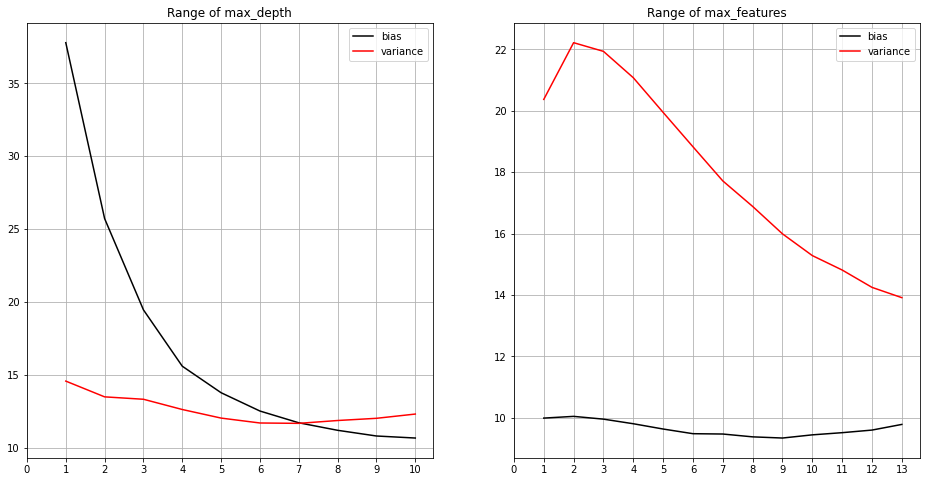

In [101]:
plt.figure(figsize = (16, 8));
compute_biase_variance(DecisionTreeRegressor, X, y, 1000, ['max_depth', 'max_features'])

С увелечением глубины деревья все лучше и лучше подстраиваются под исходную выборку, как следствие bias падает, но с другой стороны становятся все больше и больше похожи друг на друга, а значит более скоррелированы, поэтому начиная с опредленного порога, в данном случае - 6, variance опять растет. 

Для количества признаков: с увелечением их числа variance падает, поскольку для деревьев появляется все больше вариаций для развития, как следствие - меньше корреляции и уменьшение самой variance, для bias принципиально ничего не меняется, в какой то момент наблюдается их минимум, затем идет увелечение, но не существенное, поскольку количество признаков могут bias для дерева(из-за болшего разброса признаков), но не существенно. 

In [46]:
def compute_biase_variance_1(regressor, X, y, num_runs):
    zero_array = np.zeros(shape = (X.shape[0], num_runs));
    for j, tree in enumerate(regressor):
        bias_s, var_s = [], [];
        for n in 2**np.arange(1, 10):
            tree.n_estimators = n
            for i in range(num_runs):
                sample = np.random.randint(X.shape[0], size = X.shape[0]);
                X_train, y_train = X[sample], y[sample];
                tree.fit(X_train, y_train);
                out_frag = np.setxor1d(sample, range(X.shape[0]));
                zero_array[out_frag , i] = tree.predict(X[out_frag]);
            
                bias_zero = np.asarray(list(map(lambda n: zero_array[n, :][np.nonzero(zero_array[n, :])].mean(), range(zero_array.shape[0]))));
                arg = np.where(np.isnan(bias_zero) == False)[0];
                bias = np.power(np.array(bias_zero)[arg] - y[arg], 2).mean();
            
                var_zero = list(map(lambda n: zero_array[n, :][np.nonzero(zero_array[n, :])].var(), range(zero_array.shape[0])));
                variance = np.array(var_zero)[arg].mean();
            
                bias_s.append(bias);
                var_s.append(variance);
        plt.subplot(1, 2, j+1);
        plt.plot(bias_s, color = 'black', label = 'bias');
        plt.plot(var_s, color = 'red', label = 'variance');
        plt.legend();
        plt.tight_layout();
        plt.xlabel('Range of n_estimators')
        plt.grid();
        if j == 0:
            plt.title(f'Range for RF');
        else:
            plt.title(f'Range fo GB')

Wall time: 12min 21s


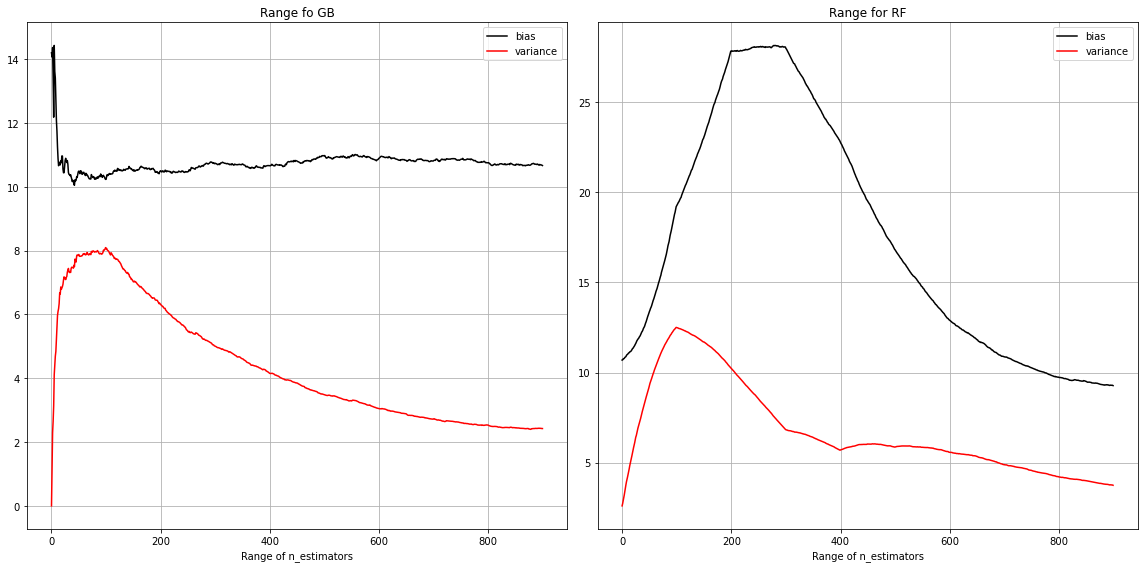

In [48]:
%%time
plt.figure(figsize = (16, 8));
compute_biase_variance_1([RandomForestRegressor(), GradientBoostingRegressor()], X, y, 100)

Для СЛ можно сделать вывод, что качество модели с увеличением количества деревьев не увеличивается, поскольку каждая новая модель настраивается на свои ошибки, не зная о предыдущих. Это касается, как bias, так и variance.

Для ГБ ситуация обратная, количество деревьев улучшает общее качества модели, делаю меньше и bias, и variance, но при этом есть риск переобучиться. 

P.S. Картинки перепутаны. Слева - RF, справа - GB.